PSF Simulation
==============

The goal of this simulation is to create a PSF (Point Source Function) to place photons according their wavelength and the parameters of the telescope and the atmosphere.

Careful: if you look at the input file, you can see that the processor number is equal to 5. If your computer/servor can't use all those processors, change it !

First, let's import the packages we need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spiakid_simulation.PhotonSimulator as PS

ModuleNotFoundError: No module named 'spiakid_simulation'

Then, let's run the simulator:

In [ ]:
sim = PS.PhotonSimulator('Template_psf.yaml')

Now, all the results are available, let's look all what does the PSF looks like at diffrent wavelength:

In [ ]:
wavelength = np.linspace(0.4,0.8,40)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(sim.psf_visu[:,:,0],origin='lower')
plt.title('PSF at '+str(wavelength[0])+'µm')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(sim.psf_visu[:,:,10],origin='lower')
plt.title('PSF at '+str(wavelength[10])+'µm')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(sim.psf_visu[:,:,20],origin='lower')
plt.title('PSF at '+str(wavelength[20])+'µm')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(sim.psf_visu[:,:,39],origin='lower')
plt.title('PSF at '+str(wavelength[39])+'µm')
plt.colorbar()

Those PSF are respected when all the photons are placed on the result, if we look at photons, we can see that the low wavelength are more distributed on the picture than the high wavelength which are more centered:

In [ ]:
x = []
y = []
lbd = []
size = np.shape(sim.psf_visu)
for i in range(len(sim.photon_dict_on_PSF[0])):
    x.append(sim.photon_dict_on_PSF[0][i][0])
    y.append(sim.photon_dict_on_PSF[0][i][1])
    lbd.append(sim.photon_dict_on_PSF[0][i][2])
plt.scatter(x,y,c=lbd)
plt.colorbar()
plt.xlim([0-size[0]/2,0+size[0]/2])
plt.ylim([0-size[0]/2,0+size[0]/2])

Maybe you can see that some photons with a high wavelength are still far from the center. It is because the probability is not 0 and it can have luck.

If you look in your folder, you can see the fits file. This is the save file of the PSF we just generated, let's look at it:

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


In [3]:
file = fits.open('/spiakid/data/PSF/psf_3.fits')[0]
wcs = WCS(file.header)

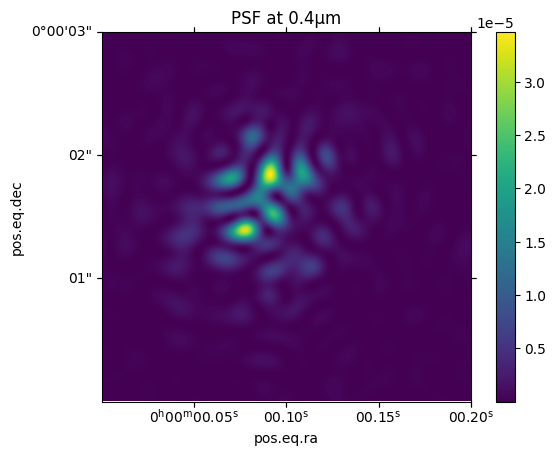

In [4]:
fig = plt.figure()
fig.add_subplot(111, projection=wcs,slices=(0,'y','x'))
plt.imshow(file.data[:,:,0], origin='lower')
plt.title('PSF at 0.4µm')
plt.colorbar()

In [5]:
data = file.data[:,:,0]

In [6]:
count = 0
list_pix = []
for i in range(len(data)):
    for j in range(len(data)):
        if data[i,j]>10e-7 : 
            count+=1
            list_pix.append((i,j,data[i,j]))
print(count,count/np.size(data)*100)

171792 17.1792


In [20]:
np.shape(file.data)[2]

40

In [8]:
np.max(data)/100

3.4666065813088534e-07

In [9]:
ENERGY = np.zeros(shape = np.shape(file.data)[2], dtype = object)
POS = np.zeros(shape = np.shape(file.data)[2], dtype = object)

for wv in range(len(ENERGY)):
    count = 0
    POS_LIST = []
    ENERGY_LIST = []
    data = file.data[:,:,wv]
    lim = np.max(file.data[:,:,wv])/100 
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j]> lim: 
                count+=1
                POS_LIST.append([i,j])
                ENERGY_LIST.append(data[i,j])

    ENERGY[wv] = ENERGY_LIST
    POS[wv] = POS_LIST


In [26]:
file.data[:,:,0][0,0]

2.0712402041699764e-07

In [10]:
photon_num = 1000
count = 0
photon_pos = []
while count<photon_num:
    E_photon = np.random.uniform(high = np.max(data))
    pix = np.random.randint(len(ENERGY[0]))
    if E_photon<= ENERGY[0][pix]:
        count+=1
        photon_pos.append([POS[0][pix][0],POS[0][pix][1]])
    
       


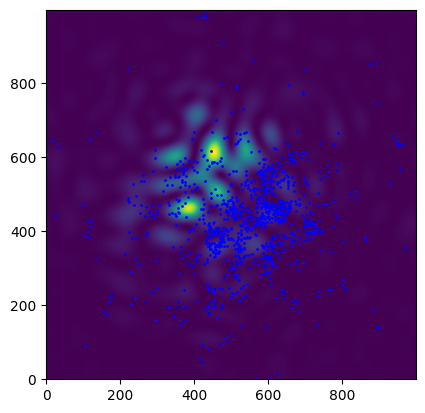

In [11]:
plt.figure()
plt.imshow(data,origin='lower')
for i in range(len(photon_pos)):
    plt.scatter(photon_pos[i][0],photon_pos[i][1],c='b',s=1)

In [12]:
np.shape(file.header['NAXIS1'])

()

In [13]:
points = np.linspace(0,1,file.header['NAXIS2'])
wv = np.linspace(0.4,1.1,40)

In [14]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [15]:
wavelength = np.random.uniform(low = wv[0],high = wv[-1])

In [16]:
wavelength

1.0751755925481947

In [17]:
type(find_nearest(wv,wavelength))

numpy.int64

In [18]:
np.shape(file.data)[0]

1000

In [19]:
wv[0]

0.4